In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [5]:
# Read data

train_data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='ISO-8859-1')

In [6]:
#view first 5 rows train data
train_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# check number of rows and columns of train data

train_data.shape

(5572, 5)

In [8]:
# to get infomation about the  train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# preprocessing

In [11]:
train_data=train_data.drop(columns=train_data.columns[2:5],axis=1)

In [12]:
#view first 5 rows train data
train_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
train_data.shape

(5572, 2)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
# checking missing values
train_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [16]:
## Check for Duplicates and Remove 
train_data.duplicated().sum() 
train_data.drop_duplicates(inplace = True)  

In [17]:
## function to preprocess the data
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [20]:
# Create list of words in discription column
train_data["v2_cleaning"] =  train_data["v2"].apply(preprocessing)

In [21]:
train_data.head()

,v1,v2,v2_cleaning
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


# Data Visualization

In [23]:
## Shows us the label counts
train_data["v1"].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

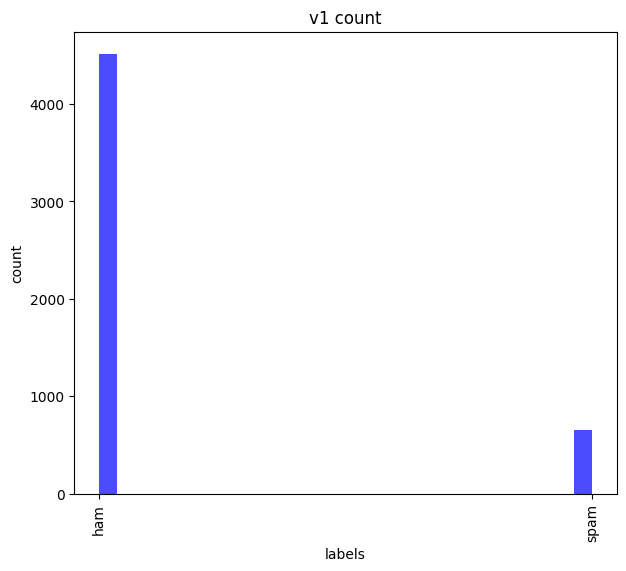

In [26]:
# Create a histogram of genre distribution
plt.figure(figsize=(7, 6))
plt.hist(train_data["v1"],bins =27 , color='blue', alpha=0.7)
plt.title("v1 count")
plt.xlabel("labels")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

In [32]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['v1_labencode'] = label_encoder.fit_transform(train_data['v1'])
train_data['v1_labencode']

class_labeles= list(label_encoder.classes_)
class_labeles   

['ham', 'spam']

In [34]:
train_data.head()

,v1,v2,v2_cleaning,v1_labencode
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,0


# Spliting training and test data

In [35]:
# Separating features and Target
x = train_data["v2_cleaning"]
y = train_data["v1"]

In [36]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3, random_state=2)

# Model Training

In [37]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features as needed

# Fit and transform the TF-IDF vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(x_test)


In [40]:
# Initialize and train classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC()
}

for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)

    # Evaluate the performance of each classifier
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")

Classifier: Naive Bayes
Accuracy: 0.97
Confusion Matrix:
[[1356    4]
 [  39  152]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1360
        spam       0.97      0.80      0.88       191

    accuracy                           0.97      1551
   macro avg       0.97      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551

Classifier: Logistic Regression
Accuracy: 0.96
Confusion Matrix:
[[1357    3]
 [  54  137]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1360
        spam       0.98      0.72      0.83       191

    accuracy                           0.96      1551
   macro avg       0.97      0.86      0.90      1551
weighted avg       0.96      0.96      0.96      1551

Classifier: Support Vector Machine
Accuracy: 0.98
Confusion Matrix:
[[1359    1]
 [  35  156]]
Classification Report:
      